In [74]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [75]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [76]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [77]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [78]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [79]:
train.shape

(550068, 12)

In [80]:
test.shape

(233599, 11)

In [81]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [82]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [83]:
173638/550068

0.3156664266963357

In [84]:
383247/550068

0.6967265865311197

In [85]:
# consolidationg
blackfriday=train.append(test,ignore_index=True)

In [86]:
blackfriday

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [87]:
blackfriday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [88]:
blackfriday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [89]:
783667-245982

537685

In [90]:
blackfriday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [155]:
blackfriday.nunique()

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
Marital_Status_1                  2
cat_2                             2
cat_3                             2
compare                           1
dtype: int64

In [151]:
blackfriday.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Status_1,cat_2,cat_3,compare
count,7.836670e+05,783667,783667,783667,783667.0,783667,783667,783667.0,783667.000000,537685.000000,237858.000000,550068.000000,783667,783667,783667,783667
unique,NaN,3677,2,7,21.0,3,5,2.0,NaN,NaN,NaN,NaN,2,2,2,1
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,NaN,NaN,NaN,NaN,U,False,True,False
freq,NaN,2709,590031,313015,103086.0,329739,276425,462538.0,NaN,NaN,NaN,NaN,462538,537685,545809,783667
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.366196,9.844506,12.668605,9263.968713,NaN,NaN,NaN,NaN
std,1.727267e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.878160,5.089093,4.125510,5023.065394,NaN,NaN,NaN,NaN
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,3.000000,12.000000,NaN,NaN,NaN,NaN
25%,1.001519e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,9.000000,5823.000000,NaN,NaN,NaN,NaN
50%,1.003075e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.000000,14.000000,8047.000000,NaN,NaN,NaN,NaN
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,15.000000,16.000000,12054.000000,NaN,NaN,NaN,NaN


In [91]:
blackfriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [92]:
blackfriday["Occupation"] = blackfriday['Occupation'].astype('object')

In [93]:
blackfriday["Marital_Status"] = blackfriday['Marital_Status'].astype('object')

In [94]:
blackfriday["Stay_In_Current_City_Years"] = blackfriday['Stay_In_Current_City_Years'].astype('object')

In [95]:
blackfriday.Product_ID.count()

783667

In [96]:
blackfriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  object 
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  object 
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 71.7+ MB


In [97]:
blackfriday.Gender.unique()

array(['F', 'M'], dtype=object)

In [98]:
blackfriday["Gender"].value_counts(normalize=True)*100

M    75.291036
F    24.708964
Name: Gender, dtype: float64

In [99]:
blackfriday.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [100]:
blackfriday["Age"].value_counts(normalize=True)*100

26-35    39.942348
36-45    19.998801
18-25    18.113944
46-50     8.329814
51-55     6.990724
55+       3.902040
0-17      2.722330
Name: Age, dtype: float64

In [101]:
#print(f"Unique Values from 3 Columns: {pd.concat([blackfriday['User_ID'],blackfriday['Product_ID'],blackfriday['Gender'],blackfriday['Age'],blackfriday['Occupation'],blackfriday['City_Category'],blackfriday['Stay_In_Current_City_Years'],blackfriday['Marital_Status'],blackfriday['Product_Category_1'],blackfriday['Product_Category_2'],blackfriday['Product_Category_3'],blackfriday['Purchase']]).unique()}")

In [102]:
blackfriday.Product_ID.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00030342',
       'P00074942', 'P00253842'], dtype=object)

In [103]:
#blackfriday["Product_ID"].value_counts(normalize=True)*100

In [104]:
blackfriday.User_ID

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
783662    1006036
783663    1006036
783664    1006036
783665    1006037
783666    1006039
Name: User_ID, Length: 783667, dtype: int64

In [105]:
blackfriday.Occupation.unique()

array([10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14,
       13, 6], dtype=object)

In [106]:
#blackfriday["Occupation"].value_counts(normalize=True)*100

In [107]:
blackfriday.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [108]:
blackfriday["City_Category"].value_counts(normalize=True)*100

B    42.076418
C    31.095350
A    26.828232
Name: City_Category, dtype: float64

In [109]:
blackfriday.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [110]:
blackfriday["Stay_In_Current_City_Years"].value_counts(normalize=True)*100

1     35.273273
2     18.557244
3     17.281320
4+    15.398250
0     13.489913
Name: Stay_In_Current_City_Years, dtype: float64

In [111]:
blackfriday.Marital_Status.unique()

array([0, 1], dtype=object)

In [112]:
blackfriday["Marital_Status"].value_counts(normalize=True)*100

0    59.022263
1    40.977737
Name: Marital_Status, dtype: float64

In [113]:
blackfriday.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [114]:
blackfriday["Product_Category_1"].value_counts(normalize=True)*100

5     27.556347
1     25.610240
8     20.709562
11     4.394724
2      4.345723
6      3.742151
3      3.673882
4      2.138153
16     1.777924
15     1.146405
13     1.011909
10     0.940833
12     0.715865
7      0.682050
18     0.566057
20     0.325393
14     0.278945
19     0.204551
17     0.102212
9      0.077074
Name: Product_Category_1, dtype: float64

In [115]:
blackfriday.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [116]:
blackfriday["Product_Category_2"].value_counts(normalize=True)*100

8.0     16.983364
14.0    14.661744
2.0     13.111394
16.0    11.472702
15.0    10.064257
5.0      6.912040
4.0      6.826488
6.0      4.384537
11.0     3.762426
17.0     3.553010
13.0     2.799781
9.0      1.520779
12.0     1.450849
10.0     0.822043
3.0      0.766806
18.0     0.748952
7.0      0.158829
Name: Product_Category_2, dtype: float64

In [117]:
blackfriday.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [118]:
blackfriday["Product_Category_3"].value_counts(normalize=True)*100

16.0    19.536446
15.0    16.803303
14.0    11.049870
17.0    10.013537
5.0     10.005550
8.0      7.509102
9.0      6.950365
12.0     5.513794
13.0     3.299868
6.0      2.895845
18.0     2.783594
4.0      1.131347
11.0     1.086783
10.0     1.051468
3.0      0.369128
Name: Product_Category_3, dtype: float64

In [119]:
#blackfriday.Purchase.unique()

In [120]:
duplicate_df = blackfriday[blackfriday.duplicated(keep = False)]
duplicate_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [121]:
blackfriday.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [122]:
#sns.distplot(blackfriday["Occupation"])

In [123]:
carrier_count = blackfriday['Occupation'].value_counts()

<AxesSubplot:>

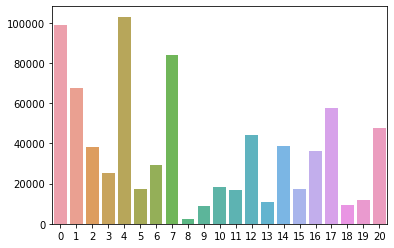

In [124]:
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

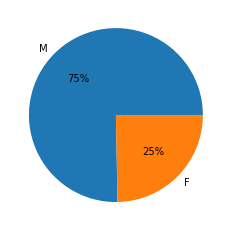

In [125]:
targetCounts = blackfriday.Gender.value_counts()
targetLabels  =['M', 'F'] 

plt.pie(targetCounts,labels= targetLabels,  autopct='%.0f%%')
plt.show()

In [126]:
blackfriday['Marital_Status_1'] = np.where( blackfriday.Marital_Status == 1,"M" , "U")

In [127]:
blackfriday

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Status_1
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,U
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,U
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,U
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,U
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,M
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,M
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,M
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,U


In [128]:
#sns.barplot(y=blackfriday['Purchase'],x=blackfriday['Marital_Status_1'])

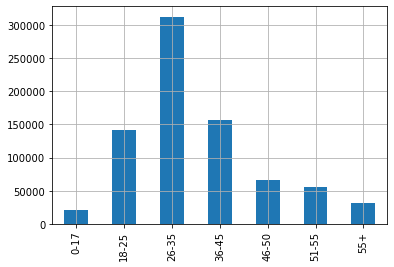

In [146]:
blackfriday.Age.value_counts().reindex(["0-17", "18-25", "26-35","36-45","46-50","51-55","55+"]).plot(kind="bar")
plt.grid()
plt.show()

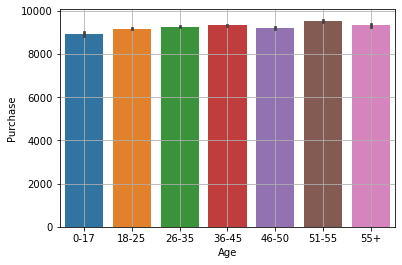

In [149]:
sns.barplot(x=blackfriday["Age"], y=blackfriday["Purchase"],order=["0-17", "18-25", "26-35","36-45","46-50","51-55","55+"])
plt.grid()
plt.show()

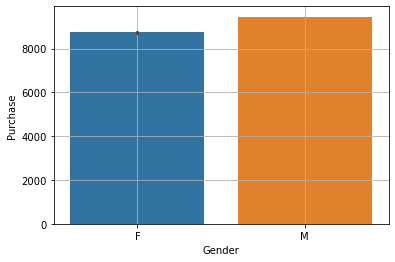

In [148]:
sns.barplot(x='Gender',y="Purchase",data=blackfriday)
plt.grid()
plt.show()

<AxesSubplot:>

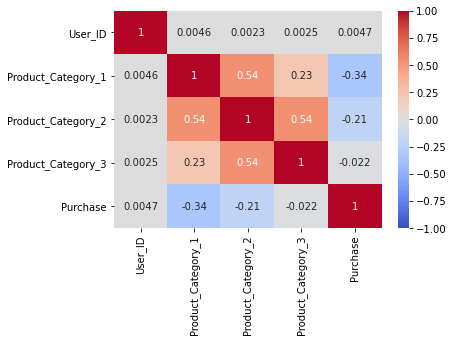

In [132]:
sns.heatmap(blackfriday.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='coolwarm')

In [133]:
blackfriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  object 
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  object 
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  Marital_Status_1            783667 non-null  object 
dtypes: float64(3),

In [134]:
blackfriday["cat_2"]=blackfriday["Product_Category_2"].isnull()

In [135]:
blackfriday["cat_3"]=blackfriday["Product_Category_3"].isnull()

In [136]:
blackfriday["compare"]=(blackfriday['cat_2'] == True) & (blackfriday['cat_3'] == False)

In [137]:
blackfriday["compare"].value_counts(normalize=True)*100

False    100.0
Name: compare, dtype: float64

In [145]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Status_1,cat_2,cat_3,compare
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,U,True,True,False
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,U,False,False,False
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,U,True,True,False
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,U,False,True,False
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,U,True,True,False


In [139]:
blackfriday["compare"].value_counts(normalize=True)*100

False    100.0
Name: compare, dtype: float64

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

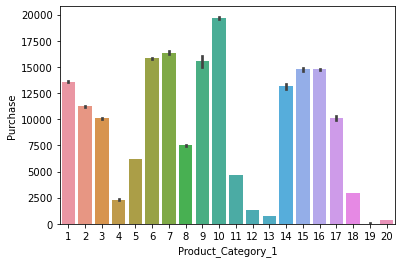

In [140]:
sns.barplot(x='Product_Category_1',y="Purchase",data=blackfriday)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

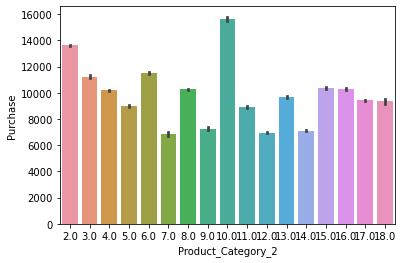

In [154]:
sns.barplot(x='Product_Category_2',y="Purchase",data=blackfriday)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

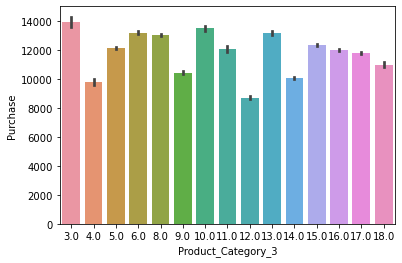

In [142]:
sns.barplot(x='Product_Category_3',y="Purchase",data=blackfriday)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Product_Category_2'>

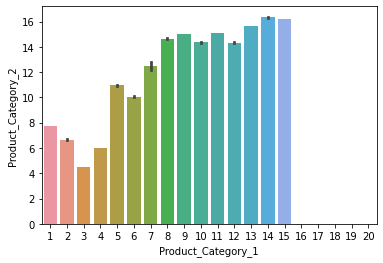

In [143]:
sns.barplot(x='Product_Category_1',y="Product_Category_2",data=blackfriday)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Product_Category_3'>

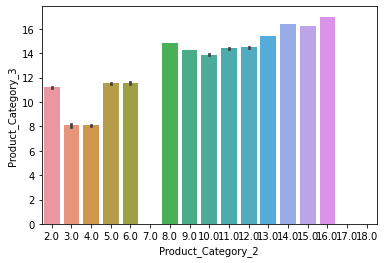

In [144]:
sns.barplot(x='Product_Category_2',y="Product_Category_3",data=blackfriday)

In [152]:
#blackfriday

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Status_1,cat_2,cat_3,compare
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,U,True,True,False
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,U,False,False,False
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,U,True,True,False
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,U,False,True,False
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,U,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,M,True,True,False
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,M,False,True,False
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,M,False,False,False
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,U,False,True,False


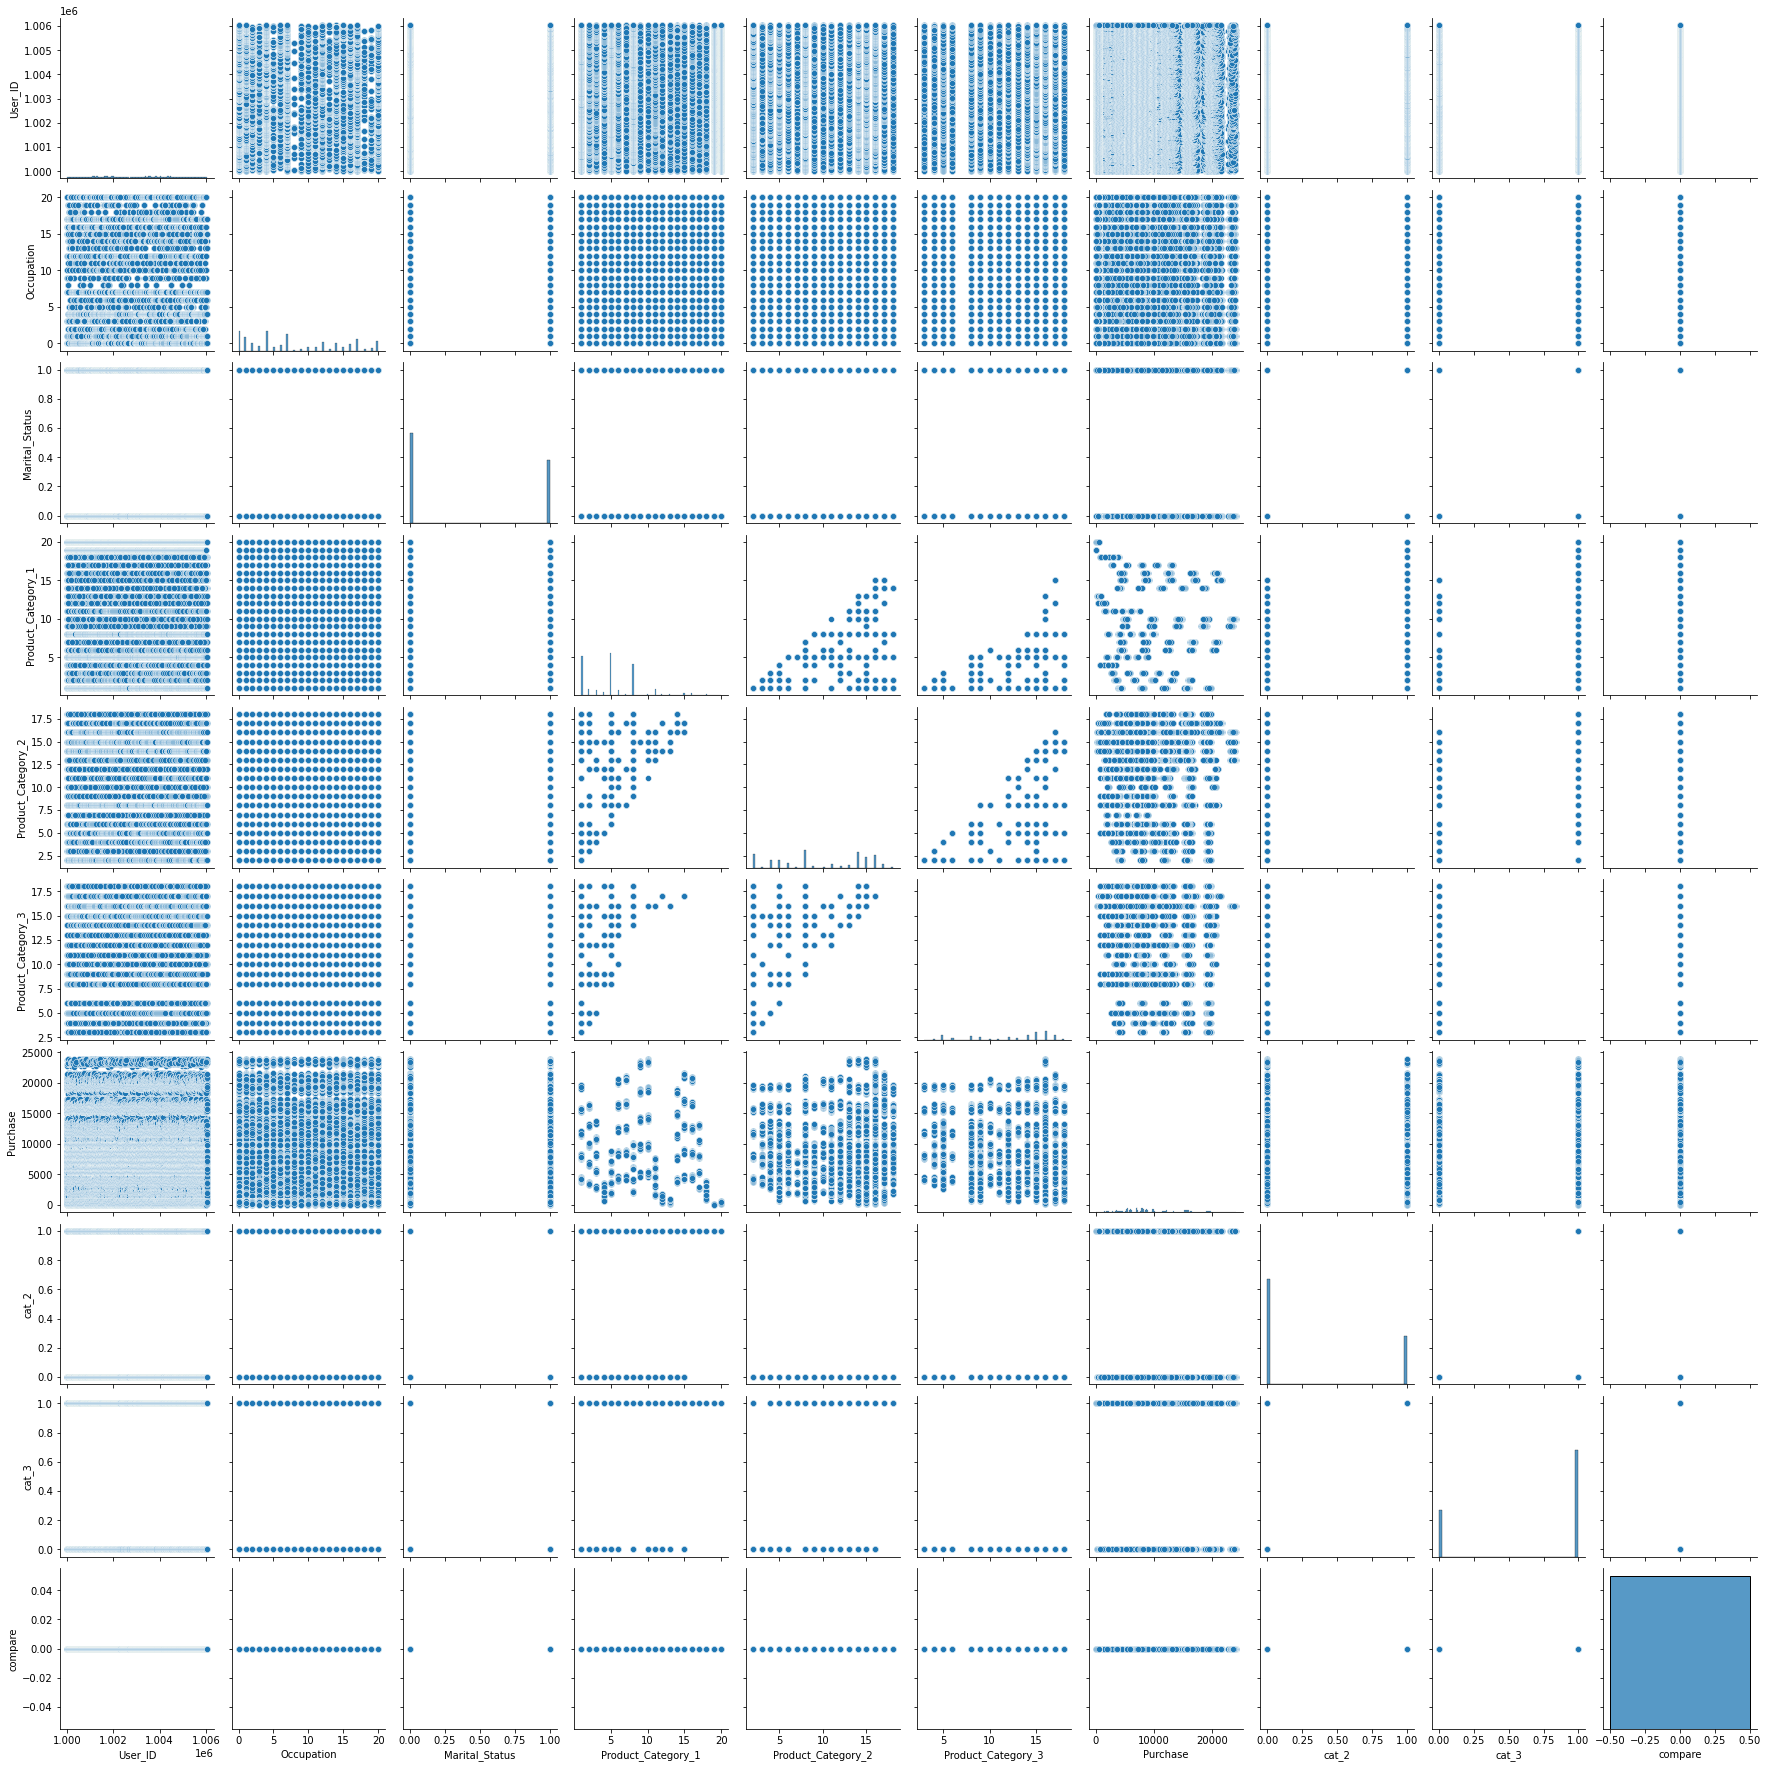

In [150]:
#sns.pairplot(blackfriday)